In [35]:
import yahoo_fin.options as ops
import yahoo_fin.stock_info as si
import opstrat as op
import datetime
from scipy import optimize, stats

In [3]:
today = datetime.date.today()
formatted_date = today.strftime('%m/%d/%Y')
formatted_date

'04/27/2023'

In [127]:
expiration_dates = ops.get_expiration_dates("AAPL")
expiration_dates

['April 28, 2023',
 'May 5, 2023',
 'May 12, 2023',
 'May 19, 2023',
 'May 26, 2023',
 'June 2, 2023',
 'June 16, 2023',
 'July 21, 2023',
 'August 18, 2023',
 'September 15, 2023',
 'October 20, 2023',
 'November 17, 2023',
 'December 15, 2023',
 'January 19, 2024',
 'March 15, 2024',
 'June 21, 2024',
 'September 20, 2024',
 'December 20, 2024',
 'January 17, 2025',
 'June 20, 2025',
 'December 19, 2025']

In [130]:
disneyCalls = ops.get_calls("AAPL",expiration_dates[-3])
disneyCalls.set_index("Contract Name",inplace = True)
disneyCalls

,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
Contract Name,,,,,,,,,,
AAPL250117C00050000,2023-04-21 3:46PM EDT,50.0,117.50,119.35,120.45,0.00,-,6,984,61.38%
AAPL250117C00055000,2023-04-20 10:13AM EDT,55.0,115.53,115.25,117.05,0.00,-,1,1678,64.06%
AAPL250117C00060000,2023-04-25 12:39PM EDT,60.0,107.95,110.80,112.85,0.00,-,5,416,62.67%
AAPL250117C00065000,2023-04-18 11:34AM EDT,65.0,106.06,106.05,108.00,0.00,-,3,590,59.16%
AAPL250117C00070000,2023-04-25 12:54PM EDT,70.0,99.00,100.85,103.20,0.00,-,3,944,55.12%
AAPL250117C00075000,2023-04-26 2:31PM EDT,75.0,94.00,96.40,99.10,0.00,-,2,2064,53.96%
AAPL250117C00080000,2023-04-25 3:53PM EDT,80.0,89.87,92.05,94.80,0.00,-,60,557,52.48%
AAPL250117C00085000,2023-04-14 3:52PM EDT,85.0,86.95,88.95,89.95,0.00,-,2,493,51.89%
AAPL250117C00090000,2023-04-26 2:35PM EDT,90.0,81.10,84.30,85.90,0.00,-,7,606,50.12%


In [131]:
disneyPuts = ops.get_puts("AAPL",expiration_dates[-3])
disneyPuts.set_index("Contract Name",inplace = True)
disneyPuts

,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
Contract Name,,,,,,,,,,
AAPL250117P00050000,2023-04-21 3:31PM EDT,50.0,0.40,0.33,0.66,0.00,-,20,7864,48.95%
AAPL250117P00055000,2023-04-26 2:26PM EDT,55.0,0.61,0.48,0.71,0.00,-,3,281,45.92%
AAPL250117P00060000,2023-04-26 11:35AM EDT,60.0,0.80,0.63,0.88,0.00,-,1,467,44.29%
AAPL250117P00065000,2023-04-19 9:48AM EDT,65.0,0.92,0.81,1.07,0.00,-,4,486,42.70%
AAPL250117P00070000,2023-04-26 9:30AM EDT,70.0,1.20,1.10,1.30,0.00,-,5,1823,41.28%
AAPL250117P00075000,2023-04-24 3:13PM EDT,75.0,1.38,1.29,1.57,0.00,-,4,749,39.99%
AAPL250117P00080000,2023-04-27 12:27PM EDT,80.0,1.74,1.53,1.76,-0.16,-8.42%,40,1467,38.16%
AAPL250117P00085000,2023-04-19 10:39AM EDT,85.0,1.97,1.95,2.23,0.00,-,7,938,37.57%
AAPL250117P00090000,2023-04-27 11:46AM EDT,90.0,2.47,2.35,2.52,-0.11,-4.26%,5,2951,36.04%


### Single Plot

In [132]:
disneyCall = disneyCalls.loc['AAPL250117C00160000']
disneyCall

Last Trade Date       2023-04-27 2:15PM EDT
Strike                                160.0
Last Price                            33.71
Bid                                   33.85
Ask                                   34.15
Change                                 2.55
% Change                             +8.18%
Volume                                  191
Open Interest                          8923
Implied Volatility                   35.24%
Name: AAPL250117C00160000, dtype: object

In [133]:
dis_daily = si.get_data("AAPL", start_date="01/01/2023", end_date=today, index_as_date = True, interval="1d")
dis_today = dis_daily.iloc[-1]
dis_today

open        163.059998
high        165.279999
low         162.800003
close       163.759995
adjclose    163.759995
volume        45425700
ticker            AAPL
Name: 2023-04-26 00:00:00, dtype: object

In [134]:
disSpot = dis_today[3]
disStrike = disneyCall[1]

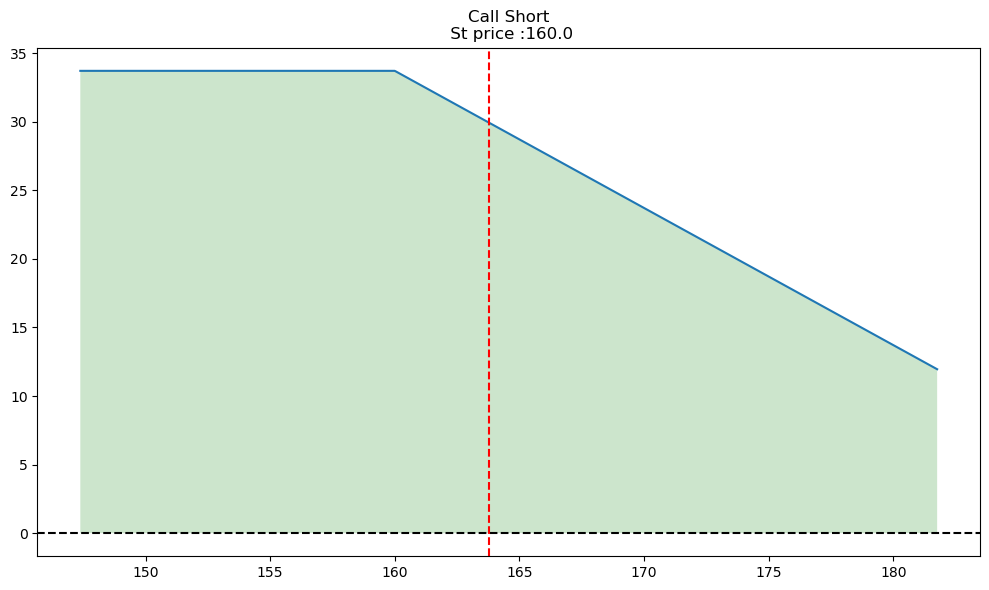

In [135]:
op.single_plotter(spot=disSpot, strike=disStrike, op_type='c', tr_type='s', op_pr=disneyCall[2])

### Multi Plot (Portfolio)

In [107]:
disneyPut = disneyPuts.loc['DIS240621P00100000']
disneyPut

Last Trade Date       2023-04-25 3:55PM EDT
Strike                                100.0
Last Price                             12.2
Bid                                    11.3
Ask                                    11.4
Change                                 0.43
% Change                             +3.65%
Volume                                    1
Open Interest                          1707
Implied Volatility                   25.60%
Name: DIS240621P00100000, dtype: object

In [136]:
disSpot = dis_today[3]
disStrike1 = disneyPut[1]
disStrike2 = disneyCall[1]

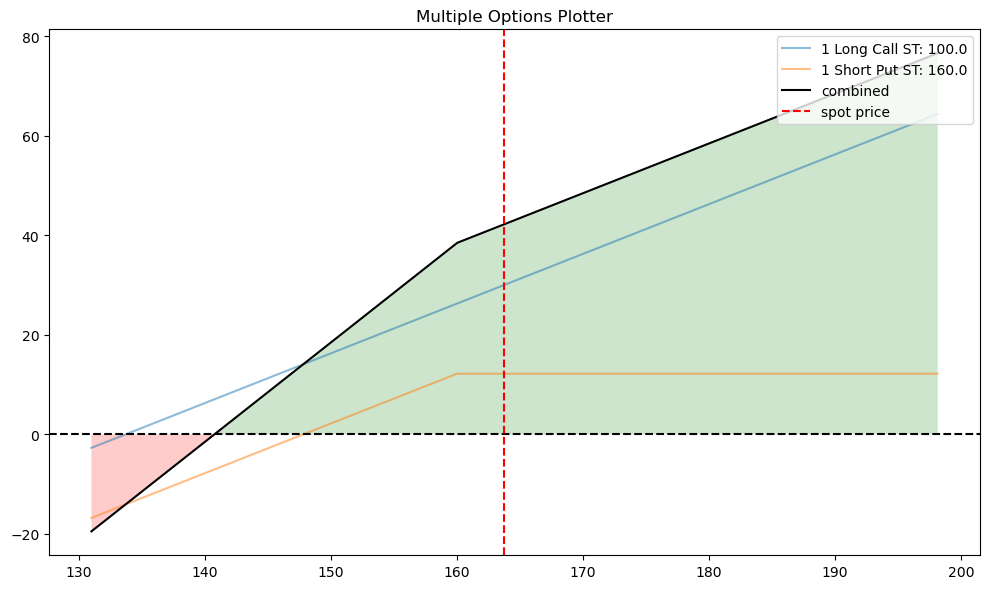

In [138]:
op1={'op_type': 'c', 'strike': disStrike1, 'tr_type': 'b', 'op_pr': disneyCall[2]}
op2={'op_type': 'p', 'strike': disStrike2, 'tr_type': 's', 'op_pr': disneyPut[2]}

op_list=[op1, op2]
op.multi_plotter(spot=disSpot, op_list=op_list)

### Implied volatility

In [142]:
implied_volatility = disneyCall[-1]
implied_volatility

'35.24%'

### Option Price

In [143]:
disneyCall[2]

33.71

### Profit / Loss

In [150]:
disneyCall

Last Trade Date       2023-04-27 2:15PM EDT
Strike                                160.0
Last Price                            33.71
Bid                                   33.85
Ask                                   34.15
Change                                 2.55
% Change                             +8.18%
Volume                                  191
Open Interest                          8923
Implied Volatility                   35.24%
Name: AAPL250117C00160000, dtype: object

In [153]:
from optionprice import Option

ploss = {'Equity Market Price': [disStrike2-10,disStrike2,disStrike2+10,disStrike2+20,disStrike2+30,disStrike2+40]}
noc = int(disneyCall[-3]) #number of contracts bought/sold
sperc = 100*noc #100 shares per contract
df = pd.DataFrame(ploss, columns = ['Equity Market Price','Profit/Loss'])
payoffs = []
for i in df['Equity Market Price']:

# Calculate Option Payoffs
        payoff = ((i - disStrike2) * sperc) - (disneyCall[2]*sperc)
        payoffs.append(payoff)

# Create DataFrame


ploss['Profit/Loss']=payoffs
final=pd.DataFrame(ploss,columns=['Equity Market Price','Profit/Loss'])
#Note that calculations may not show zero value for options at purchase price view iterations differences
print(final)

   Equity Market Price  Profit/Loss
0                150.0    -834861.0
1                160.0    -643861.0
2                170.0    -452861.0
3                180.0    -261861.0
4                190.0     -70861.0
5                200.0     120139.0
